# StatQuest Machine Learning Playlist Notes:

https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

## V-1: A Gentle Introduction to Machine Learning

- Fitting the Training Data well but making poor predictions is called the __Bias-Varience Tradeoff__.

- The idea about choosing the best machine learning method is __how well a method performs on testing data__. It can be any method performs well with your problem.

## V-2: Cross Validation

- Want to use the variables Chest Pain, Good Blood Circ, Blocked Arteries, Weight to predict if smo has heart disease. Using the data we have below, we can learn.

| Chest Pain | Good Blood Circ | Blocked Arteries | Weight | __HeartDisease__ |
| --- | --- | --- |--- | --- |
| No | No | No | 125 | __No__ |
| Yes | Yes | Yes | 180 | __Yes__ |
| Yes | Yes | No | 210 | __No__ |
| ... | ... | ... | ... | __...__ |

- When a new patient comes we can use what we have learnt above. 

| Chest Pain | Good Blood Circ | Blocked Arteries | Weight | __HeartDisease__ |
| --- | --- | --- |--- | --- |
| No | Yes | No | 150 | __???__ |

- __The important question is which machine learning method we should use to solve this problem__. Logistic regession, SVM, k-NN ...? __Cross Validation__ lets us compare different machine learning methods.

#### Cross Vaidation:

When you have a machine learning problem you have a dataset. The dataset is a collection of real observations. In order to decide your machine learning algorithms' parameters (__train__ your machine learning method) you have to use some part of your dataset. This part of the dataset is called the __training set__. The remaining part of the set is the __test set__ and using the test set you will decide how well the training set is set your parameters for your machine learning method to react to an unseen data (the test set).

Now the question is how to seperate the data to training and testing sets. 

Imagine you have a dataset as shown below;

<span style='background :yellow' > |-----|-----|-----|-----| </span>


Now you want to train your method using 75% of the data and test it with 25% of it. The question is which 25% of the data you will use to test your data?

|<span style='background :red' >----- </span>|-----|-----|-----|<br>
|-----|<span style='background :red' >----- </span>|-----|-----|<br>
|-----|-----|-----|<span style='background :red' >----- </span>|<br>

Cross-Validation uses them all one at a time and summarizes it at the end. So use first 25% of data as test and the remaining as 75% of it as test and then repeat the procedure changing the parts of the data used. Then use the summary of all the data for machine learning method X. Then repeat it all for the machine learning method Y etc... Now you have a summary of how well the machine learning methods performed using the same dataset. Thus now you can decide which method you want to use for your problem. 

__Note that__ we have divided data into 4 block and this is called __4-fold cross validation__. Also note that this number (4) is arbitrary and can be anything. If you make each individual data a block (for the example above there will be 1 test and 19 traingn samples) it is called __Leave One Out Cross Validation__. In practice, dividing data into 10 blocks thus making it a __10-Fold Cross Validation__ is very common. Lastly cross validation can be used to guess a tuning parameter that is independent from our data. 

## V-3: Confusion Matrix

How to summarize how each machine learning method is peformed on test data. Create a __confusion matrix__ for each method to decide which machine learning method performed best.  

The rows of confusion matrix: what is predicted
The cols of confusion matrix: what is known 

| Confusion Matrix | Has Heart Disease | Does not have Heart Disease |
| --- | --- | --- |
| __Has Heart Disease__ | True Positives | False Positives |
| __Does not have Heart Disease__ | False Negatives | True Negatives |

Example: 

Apply Random Forest to testing data:

| Confusion Matrix | Has Heart Disease | Does not have Heart Disease |
| --- | --- | --- |
| __Has Heart Disease__ | 142 | 22 |
| __Does not have Heart__ | 29 | 110 |

Apply K-Nearest neighbors to testing data:

| Confusion Matrix | Has Heart Disease | Does not have Heart Disease |
| --- | --- | --- |
| __Has Heart Disease__ | 107 | 53 |
| __Does not have Heart__ | 64 | 79 |

The obvious choice is the Random Forest for this problem.

Imagine another dataset:

Given if people like Jurassic Park, Run for your Life, Movie X,  Movie Y, can you guess what is a persons favourite movie. In this example there are only 3 options, Troll 2, Gore Police, Cool As Ice

| Jurassic Park | Run for your Life | Movie X |  Movie Y | __Favourite Movie__ |
| --- | --- | --- | --- | --- |
| Liked | Not Liked | Liked |  Not Liked | __Troll 2__ |
| Not Liked | Liked | Not Liked | Liked | __Gore Police__ |
| Not Liked | Not Liked | Liked | Not Liked | __Cool As Ice__ |

Since you have 3 possible redictions you will have a 3x3 confusion matrix like below;

| Confusion Matrix | Troll 2 | Gore Police | Cool As Ice |
| --- | --- | --- | --- |
| __Troll 2__ | <font color='green'>12</font> | <font color='red'>102</font> | <font color='red'>93</font> |
| __Gore Police__ | <font color='red'>112</font> | <font color='green'>23</font> | <font color='red'>77</font> |
| __Cool As Ice__ |  <font color='red'>83</font> | <font color='red'>94</font> | <font color='green'>17</font> |

The diagonal of green numbers represent where the machine learning algorithm does the right thing.

__The size of the confusion matrix is determined by the number of outputs we want to predict.__

## V-4: Sensitivity and Specificity

Given a confusion matrix, how to calcualte sensitivity and specificity?

Example:

| Confusion Matrix | Has Heart Disease | Does not have Heart Disease |
| --- | --- | --- |
| __Has Heart Disease__ | <font color='green'>139</font> | <font color='red'>20</font> |
| __Does not have Heart__ | <font color='red'>32</font> | <font color='green'>112</font> |

Sensitivity: 

What percentage of patients with heart disease are correctly identified.

__Sensitivity = TP / TP + FN__

__Sensitivity = 139 / 139 + 32 = 0.8128__

Meaning: 81% of the patients __with heart disease__ are correctly identified with the chosen machine learning method.

Specificity: 

What percentage of patients without heart disease are correctly identified.

__Specificity = TN / TN + FP__

__Specificity = 112 / 112 + 20 = 0.8484__

Meaning: 85% of the patients __without heart disease__ are correctly identified with the chosen machine learning method.

Now, machine learning method 1 has sensitivity of 81% and specificity of 85%. Imagine if another machine learning method has sensitivity of 83% and specificity of 83%, how to interpret this to make a decision? What this tells us is method 2 is better in identifiying positives while method 1 is better in identifiying negatives. Thus; 

Choose method 1: if identifiying negatives are more important

Choose method 2: if identifiying positives are more important 

## V-5: Bias and Variance



Text(0.5, 1.0, 'Mice weight and height graph')

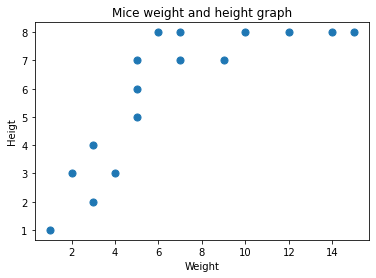

In [10]:
import matplotlib.pyplot as plt

# x axis values - weight
x = [1,3,2,4,3,5,5,5,6,7,9,7,10,12,14,15]
# y axis values - height 
y = [1,2,3,3,4,6,5,7,8,7,7,8,8,8,8,8]  
  
# plotting the points  
plt.scatter(x, y, s=50) 

# naming the x axis 
plt.xlabel('Weight') 
# naming the y axis 
plt.ylabel('Heigt') 
  
# giving a title to my graph 
plt.title('Mice weight and height graph') 



Ideally, one would have exact mathematical formula ro descrive the relationship between mice height and weight as mice gets heavier when they get taller and after a certain point they stop getting taller and they just get obese.

We don't know the exact fomula so 2 machine learning methods will be used to estimate the relationship between the weight and height of the mice.

First thing to do is to split the data to training and testing sets. 

Text(0.5, 1.0, 'Mice weight and height graph - The data is seperated to 2 groups (Training (ORANGE) and Testing (BLUE) sets)')

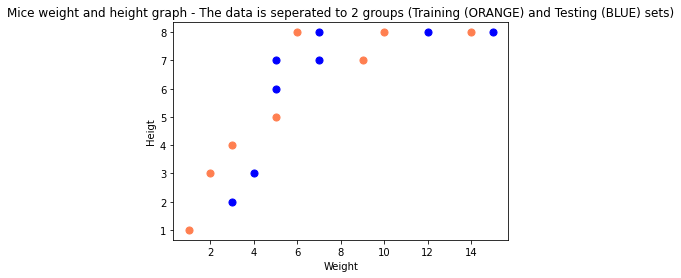

In [2]:
import matplotlib.pyplot as plt

# weight - height pairs data
mice_population=[[1,1],[3,2],[2,3],[4,3],[3,4],[5,6],[5,5],[5,7],[6,8],[7,7],[9,7],[7,8],[10,8],[12,8],[14,8],[15,8]]

# weight - height pairs training data
train_set = mice_population[0::2]

# weight - height pairs testing data
test_set = mice_population[1::2]

# plotting the training points  
plt.scatter([one_data_pair[0] for one_data_pair in train_set], [one_data_pair[1] for one_data_pair in train_set], s=50, c="coral")
# plotting the testing points  
plt.scatter([one_data_pair[0] for one_data_pair in test_set], [one_data_pair[1] for one_data_pair in test_set], s=50, c="blue")

# naming the x axis 
plt.xlabel('Weight') 
# naming the y axis 
plt.ylabel('Heigt') 
  
# giving a title to my graph 
plt.title('Mice weight and height graph - The data is seperated to 2 groups (Training (ORANGE) and Testing (BLUE) sets)') 


The first machine learning algorithm to predict weight and height relationship from the given data is linear regression (Least Squares). Linear regression fits a straight line to the training set.

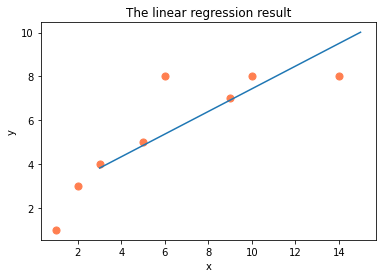

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[item] for item in [one_data_pair[0] for one_data_pair in train_set] ])
y = np.array([[item] for item in [one_data_pair[1] for one_data_pair in train_set] ])


# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new =  np.array([one_data_pair[0] for one_data_pair in test_set])
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
# plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y, s=50, c="coral")
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.title('The linear regression result') 
plt.show()

As you can see the linear regression algorithm can not represent the data perfectly. In other words the __TRUE__ realtionship between weight and height can not be represented. The inability for a machine learning method to represent the true realtionship between data is called __bias__. 